# Check if we can get trigger codes from openBCI GUI recording

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mne 

from glob import glob  

In [ ]:
data_files = glob('./*data/*.txt')
print(data_files)

['./Cyton_data/Trigger_test_Nov_12.txt']


In [3]:
# df = pd.concat([pd.read_csv(f, skiprows=4) for f in data_files], ignore_index=True)

df = pd.read_csv(data_files[0], skiprows=4, skipinitialspace=True)#.reset_index()

In [4]:
df

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Digital Channel 2 (D13),Digital Channel 3 (D17),Not Used.1,Digital Channel 4 (D18),Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Marker Channel,Timestamp (Formatted)
0,0.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:38:51.341
1,1.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:38:51.344
2,2.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:38:51.347
3,3.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:38:51.352
4,4.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:38:51.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12247,215.0,-184214.785303,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-176463.714416,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:39:40.213
12248,216.0,-184211.678411,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-176459.288771,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:39:40.217
12249,217.0,-184209.152664,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-176455.578381,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:39:40.221
12250,218.0,-184205.263460,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-176450.281018,-187500.022352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762980e+09,0.0,2025-11-12 16:39:40.224


In [5]:
df.drop(columns=["Not Used", "Not Used.1", "Accel Channel 0", "Accel Channel 1", "Accel Channel 2", "Analog Channel 0", "Analog Channel 1", "Analog Channel 2"], inplace=True)

In [6]:
df.columns

Index(['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)',
       'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)',
       'Digital Channel 4 (D18)', 'Timestamp', 'Marker Channel',
       'Timestamp (Formatted)'],
      dtype='object')

In [7]:
sfreq = 250
ch_names = df.columns[1:].tolist()

<Axes: >

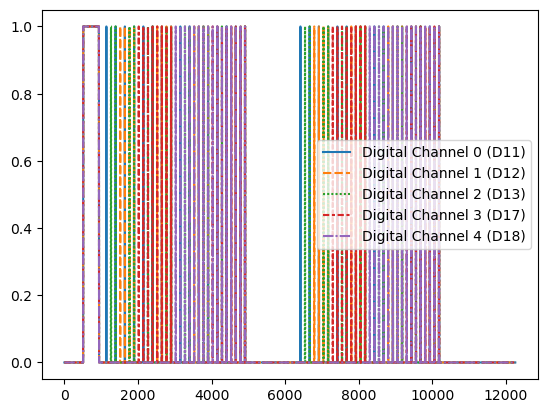

In [8]:
sns.lineplot(data=df[df.columns[9:14]])

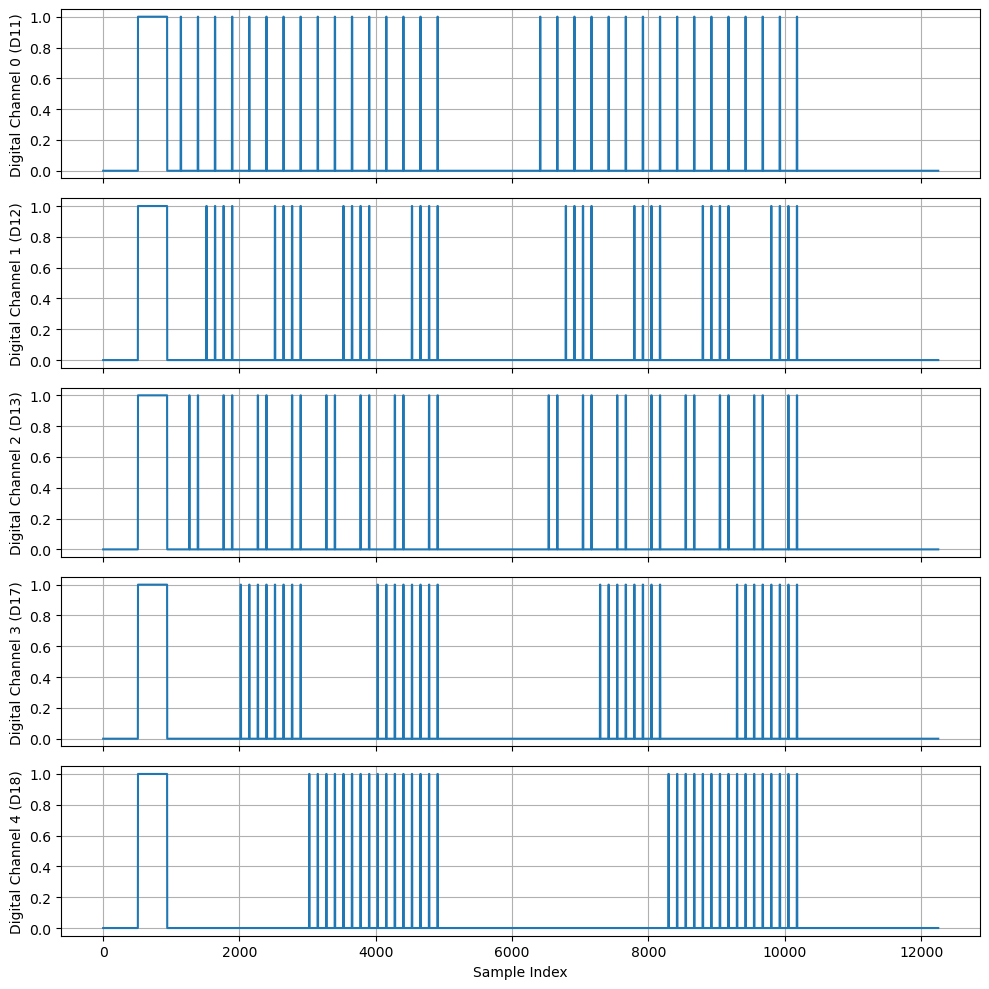

In [22]:
df_small = df.iloc[-sfreq * 50:] 

df_small[df_small.columns[9:14]] =  df_small[df_small.columns[9:14]].astype(bool)

chs = df_small.columns[9:14]
fig, axes = plt.subplots(len(chs), 1, figsize=(10, 2 * len(chs)), sharex=True)
for ax, col in zip(axes, chs):
    sns.lineplot(x=df_small.index, y=df_small[col], ax=ax)
    ax.set_ylabel(col)
    ax.grid(True)
axes[-1].set_xlabel('Sample Index')
plt.tight_layout()
plt.show()

# sns.lineplot(data=df_small[df_small.columns[9:14]])

In [23]:
test = decode_trigger_codes(df_small)

In [34]:
def decode_trigger_codes(df, digital_channels=None):
    """
    Decode 5-bit trigger codes from digital channels.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the digital channel data
    digital_channels : list, optional
        List of column names for the 5 digital channels (LSB to MSB order).
        If None, uses columns 9:14 from the dataframe.
    
    Returns:
    --------
    pandas.Series
        Series containing the decoded trigger codes (0-31)
    """
    if digital_channels is None:
        digital_channels = df.columns[9:14].tolist()
    
    # Convert to boolean if not already
    digital_data = df[digital_channels].astype(bool)
    
    bits = (digital_data == 0).astype(int)
    
    # Binary weights: 1, 2, 4, 8, 16
    weights = [2**i for i in range(len(digital_channels))]

    # Weighted sum → integer code
    trigger_codes = (bits * weights).sum(axis=1)
    
    return trigger_codes.astype(int)


def get_trigger_events(trigger_codes, min_duration=1):
    """
    Extract trigger events from decoded trigger codes.
    
    Parameters:
    -----------
    trigger_codes : pandas.Series
        Series containing decoded trigger codes
    min_duration : int, optional
        Minimum number of samples a trigger must be active
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with columns: 'onset', 'offset', 'duration', 'code'
    """
    # Find where trigger code changes
    changes = trigger_codes.diff().fillna(0) != 0
    
    events = []
    current_code = None
    onset = None
    
    for idx, code in trigger_codes.items():
        if changes.loc[idx] and code != 0:
            # New trigger starts
            onset = idx
            current_code = code
        elif changes.loc[idx] and code == 0 and current_code is not None:
            # Trigger ends
            duration = idx - onset
            if duration >= min_duration:
                events.append({
                    'onset': onset,
                    'offset': idx,
                    'duration': duration,
                    'code': current_code
                })
            current_code = None
            onset = None
    
    return pd.DataFrame(events)

   onset  offset  duration  code
0   4785    4904       119    31
1  10056   10176       120    31


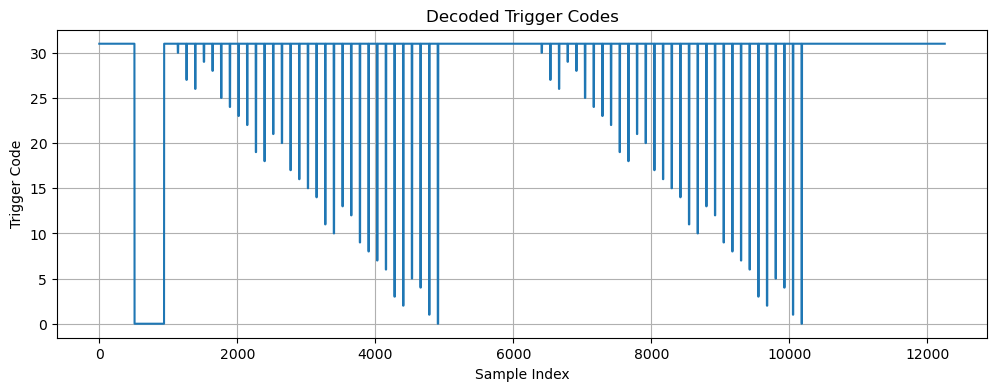

In [36]:
# Decode trigger codes
trigger_codes = decode_trigger_codes(df)

# Add to dataframe
df['trigger_code'] = trigger_codes

# Get trigger events
events = get_trigger_events(trigger_codes, min_duration=2)
print(events)

# Visualize
plt.figure(figsize=(12, 4))
plt.plot(df.index, trigger_codes)
plt.xlabel('Sample Index')
plt.ylabel('Trigger Code')
plt.title('Decoded Trigger Codes')
plt.grid(True)
plt.show()

Digital channel names: ['Digital Channel 0 (D11)', 'Digital Channel 1 (D12)', 'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)', 'Digital Channel 4 (D18)']

Unique values in each channel:
Digital Channel 0 (D11): [0. 1.]
Digital Channel 1 (D12): [0. 1.]
Digital Channel 2 (D13): [0. 1.]
Digital Channel 3 (D17): [0. 1.]
Digital Channel 4 (D18): [0. 1.]

Sample of digital channel data:
    Digital Channel 0 (D11)  Digital Channel 1 (D12)  Digital Channel 2 (D13)  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
5                       0.0                      0.0                      0.0   
6                       0.0                 

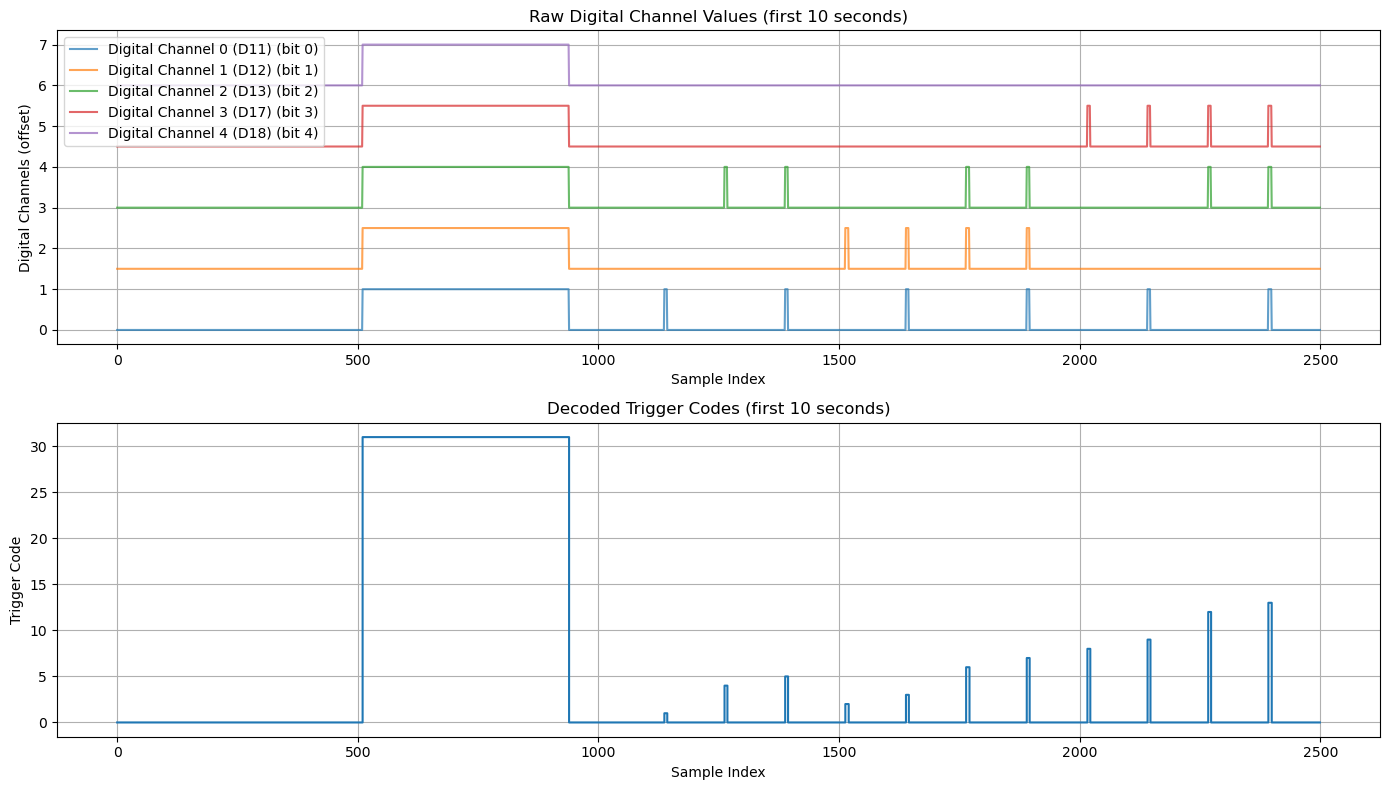

In [16]:
# Check what the digital channels actually contain
digital_channels = df.columns[9:14].tolist()
print("Digital channel names:", digital_channels)
print("\nUnique values in each channel:")
for ch in digital_channels:
    print(f"{ch}: {df[ch].unique()}")

# Look at a small section where triggers should be
print("\nSample of digital channel data:")
print(df[digital_channels].head(20))

# Check the decoded trigger codes
trigger_codes = decode_trigger_codes(df)
print("\nUnique trigger codes:", sorted(trigger_codes.unique()))
print("Trigger code value counts:")
print(trigger_codes.value_counts().sort_index())

# Visualize the decoded codes more clearly
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Plot raw digital channels
for i, ch in enumerate(digital_channels):
    ax1.plot(df.index[:sfreq*10], df[ch].iloc[:sfreq*10] + i*1.5, label=f'{ch} (bit {i})', alpha=0.7)
ax1.set_ylabel('Digital Channels (offset)')
ax1.set_xlabel('Sample Index')
ax1.legend()
ax1.grid(True)
ax1.set_title('Raw Digital Channel Values (first 10 seconds)')

# Plot decoded trigger codes
ax2.plot(df.index[:sfreq*10], trigger_codes.iloc[:sfreq*10], drawstyle='steps-post')
ax2.set_ylabel('Trigger Code')
ax2.set_xlabel('Sample Index')
ax2.grid(True)
ax2.set_title('Decoded Trigger Codes (first 10 seconds)')
plt.tight_layout()
plt.show()